 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [178]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [179]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [180]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [181]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [182]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [183]:
# Count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [184]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [185]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df["Date"] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df["Date"], inplace=True)
sp500_history_df.drop(columns=["Date"],inplace=True)
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"]
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()

C:\Users\bryce\AppData\Local\Temp\ipykernel_150364\49780058.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")


Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [186]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [187]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [188]:
# Calculate Daily Returns
sp500_history_df.isnull().sum()
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [189]:
# Drop nulls
sp500_returns_df.pct_change
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [190]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500"})
sp500_returns_df.head()

S&P500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [191]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

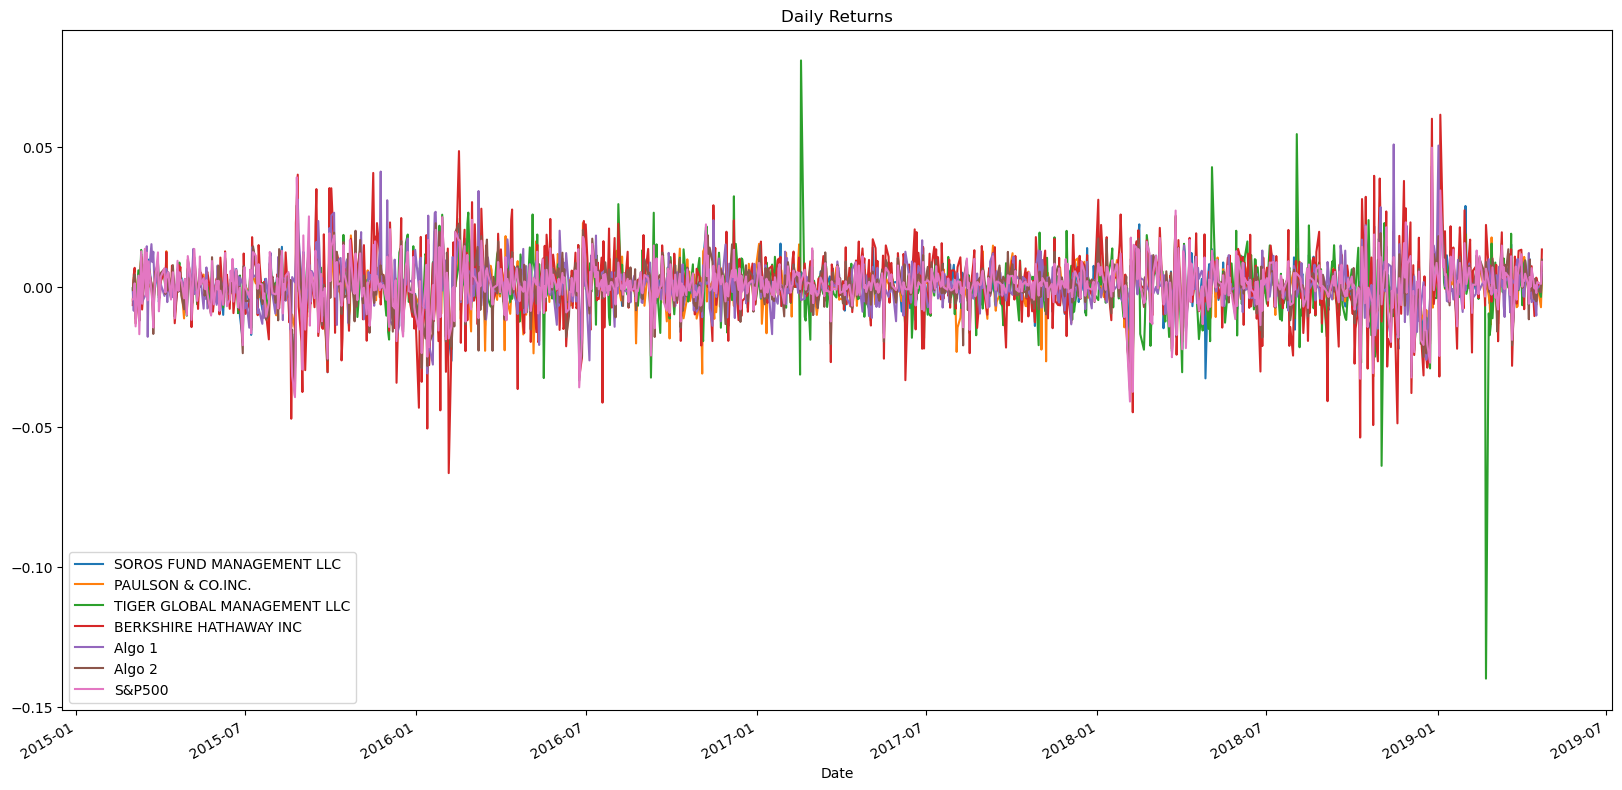

In [192]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

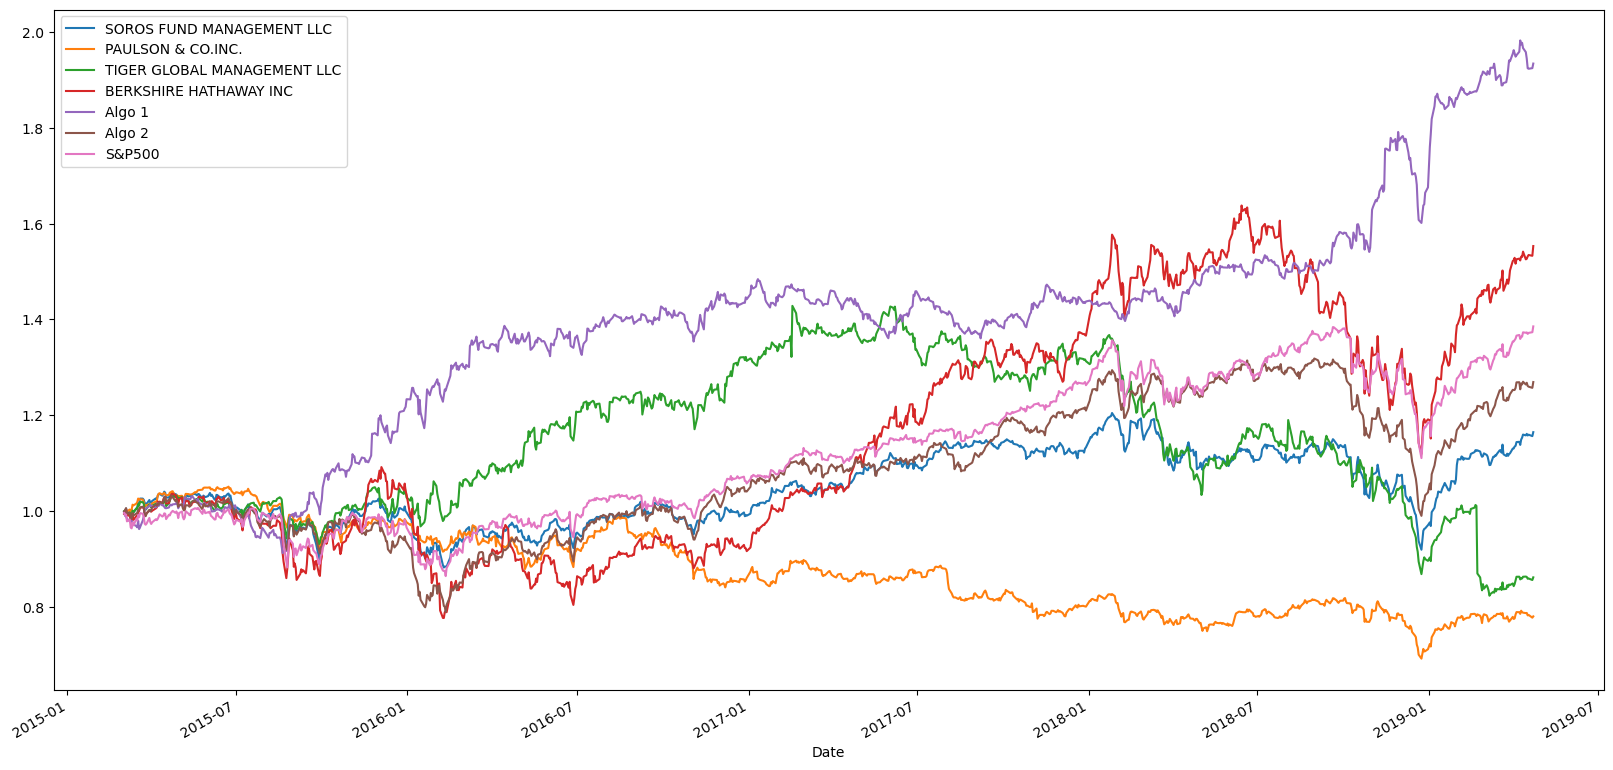

In [193]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()

# Plot cumulative returns
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

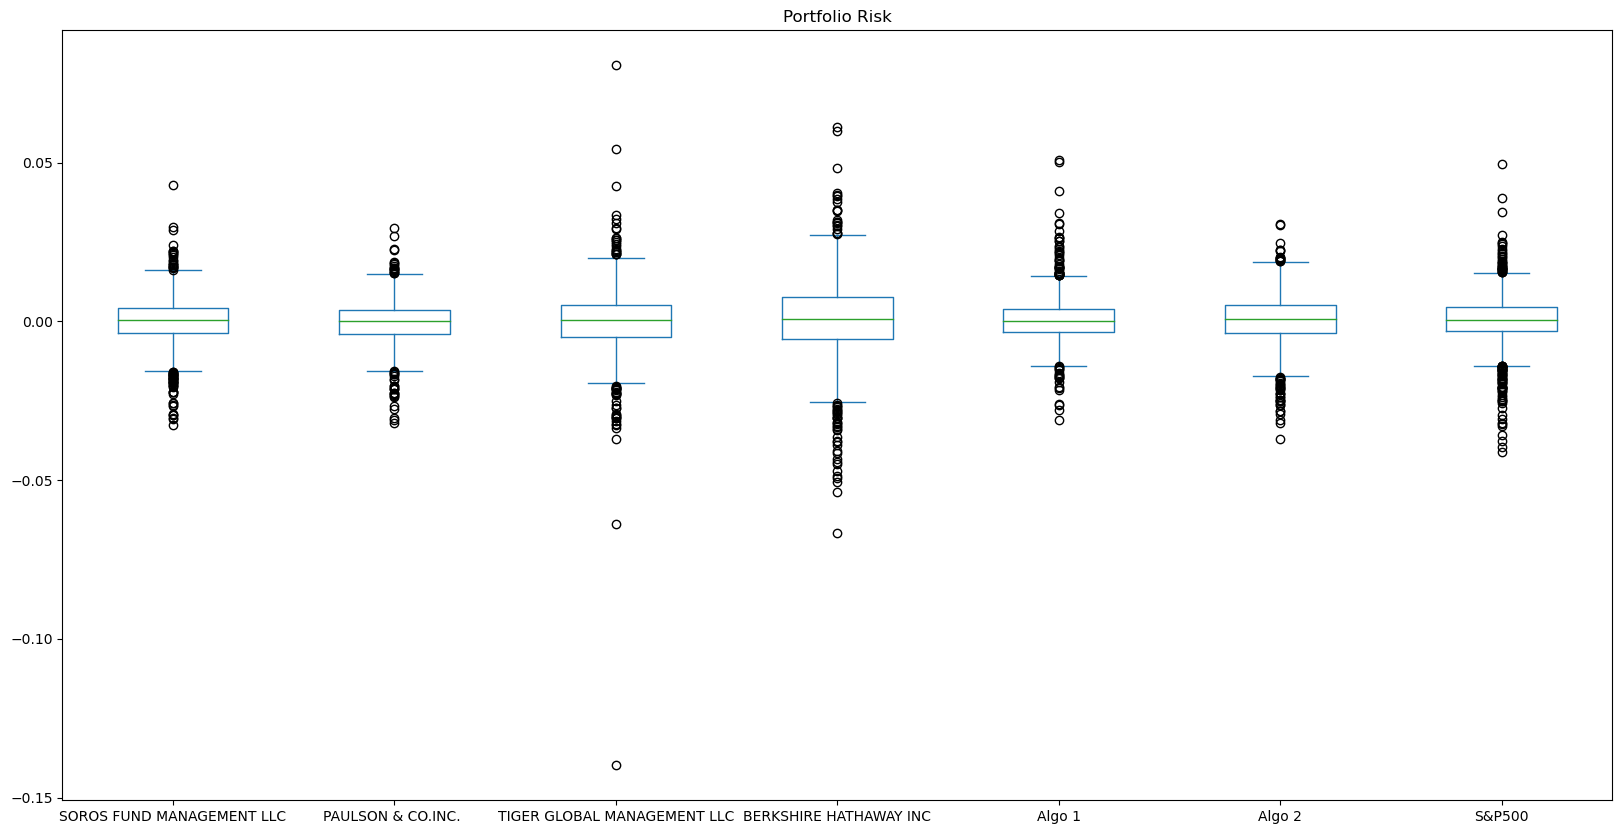

In [194]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [162]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [82]:
# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 =[daily_std > daily_std['S&P500']]
portfolios_riskier_than_SP500

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 S&P500                         False
 Algo 2                         False
 SOROS FUND MANAGEMENT LLC      False
 Algo 1                         False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [83]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

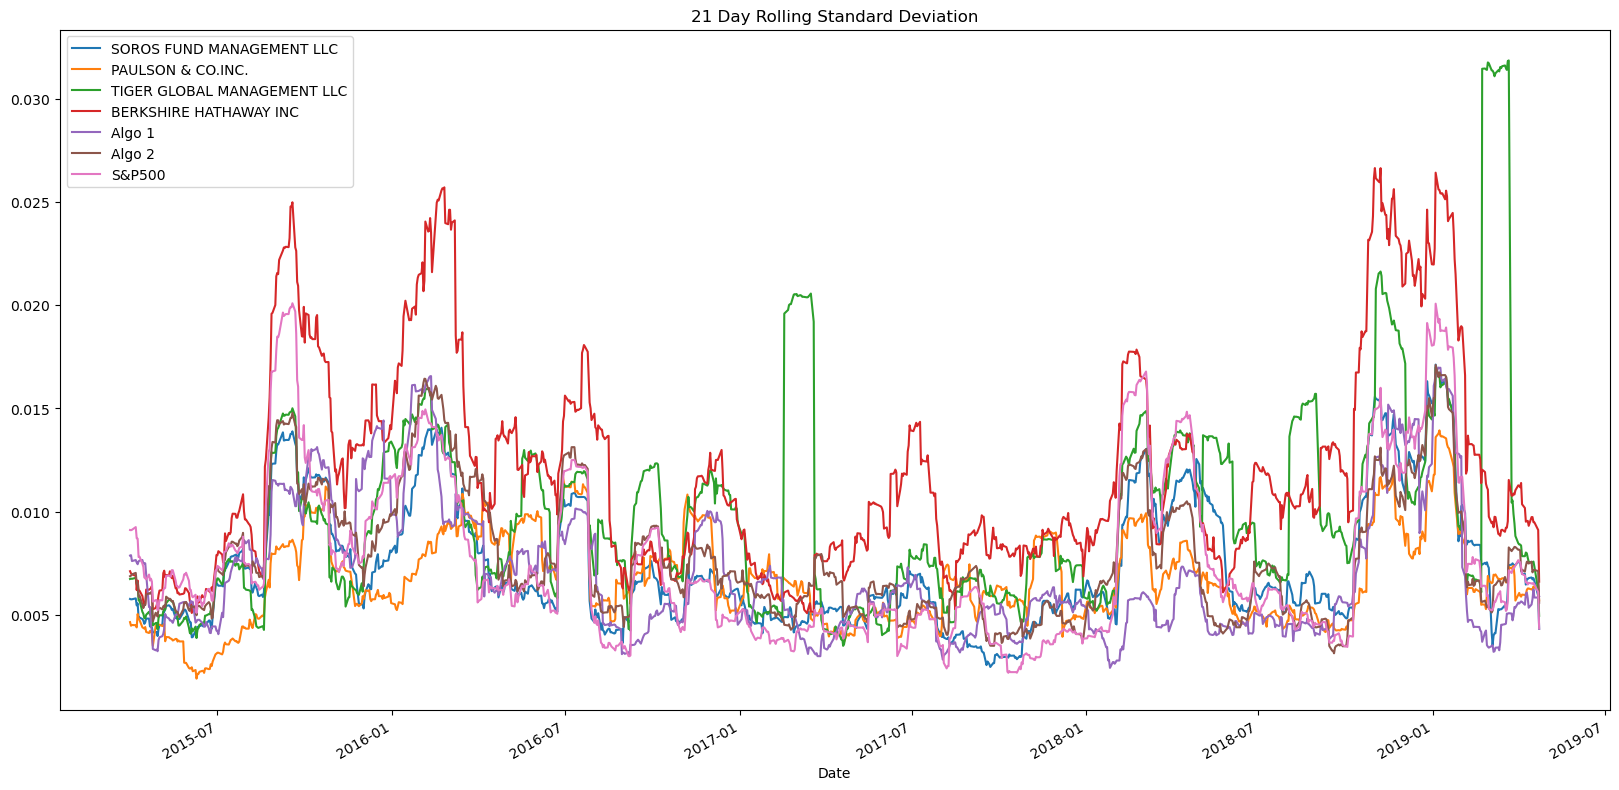

In [84]:
# Calculate & Plot the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

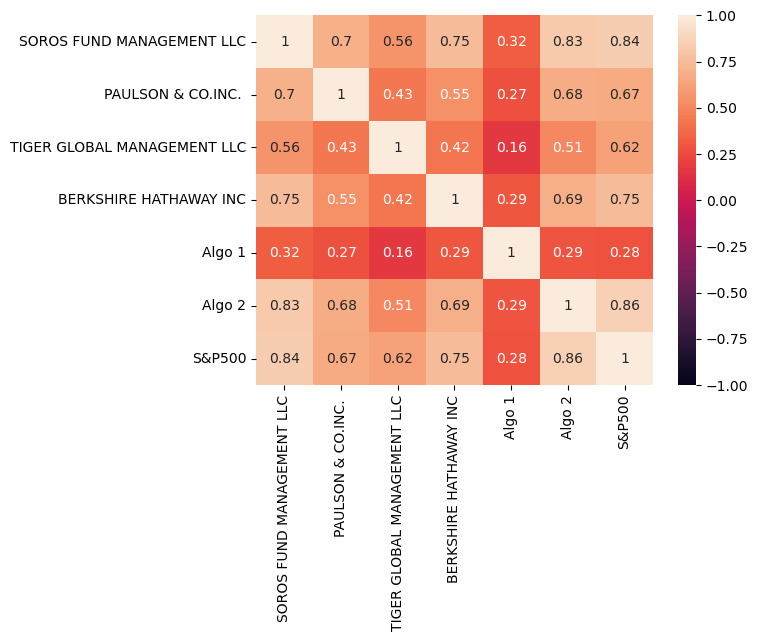

In [216]:
# Calculate the correlation
correlation = combined_portfolios_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

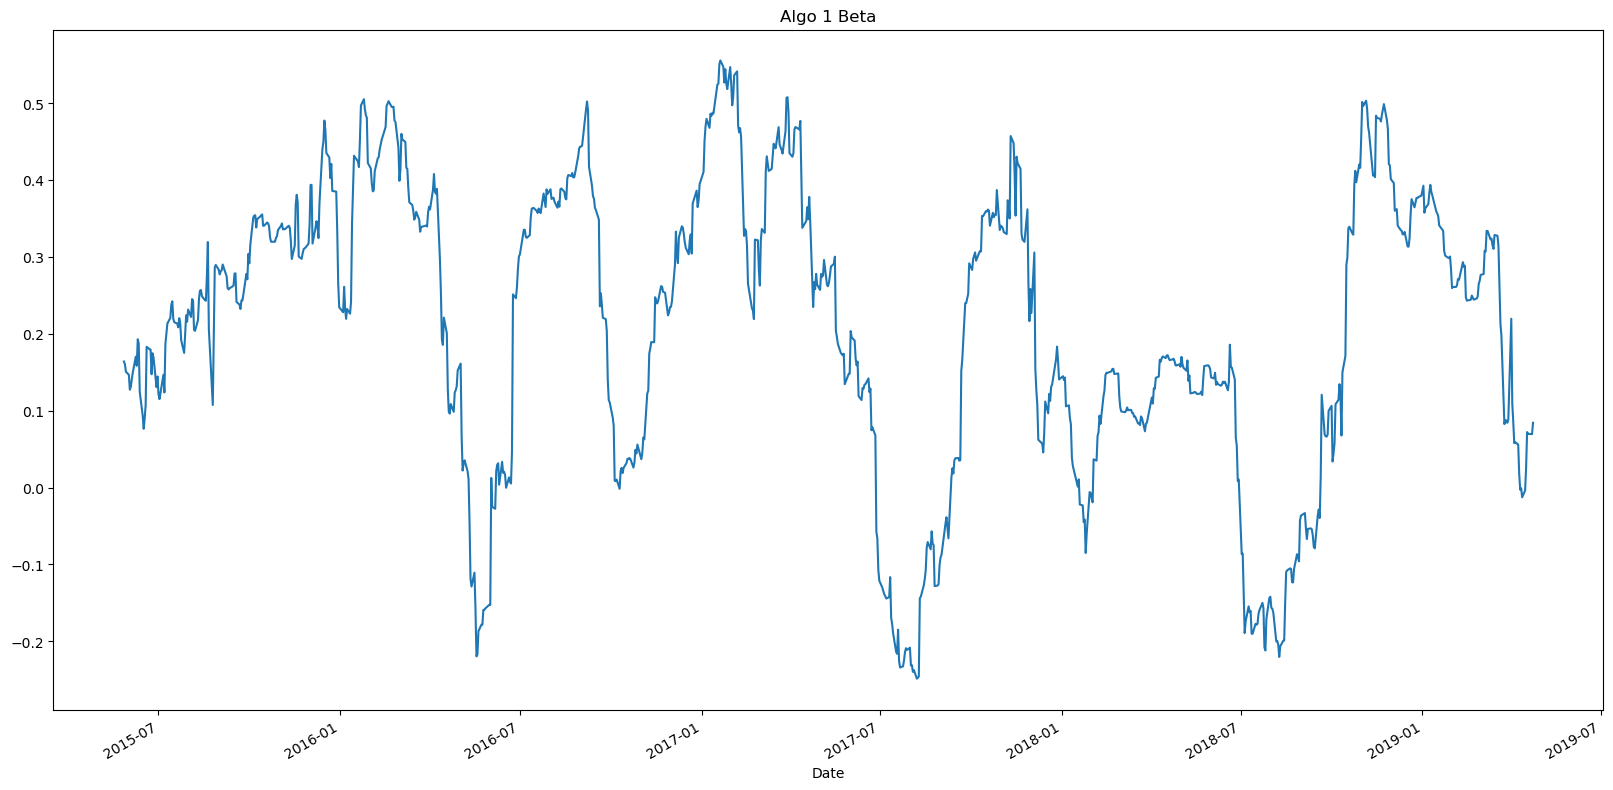

In [196]:
# Calculate covariance of a single portfolio
algo_1_covariance = combined_portfolios_df['Algo 1'].rolling(window=60).cov(combined_portfolios_df['S&P500'])
algo_1_covariance

# Calculate variance of S&P 500
variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
variance

# Computing beta
algo_1_beta = algo_1_covariance / variance

# Plot beta trend
algo_1_beta_plot = algo_1_beta.plot(title="Algo 1 Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

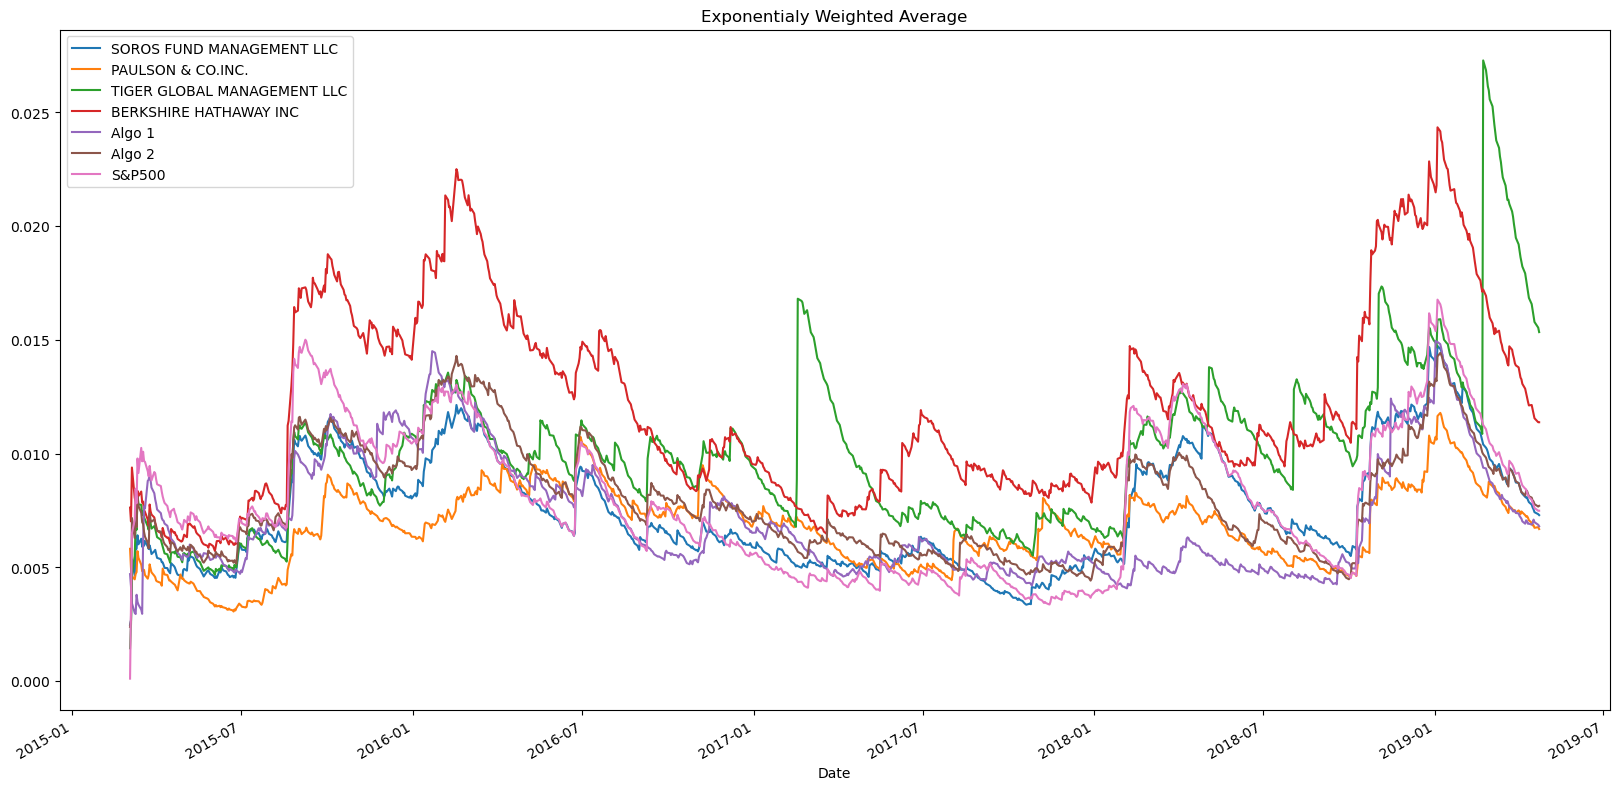

In [197]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [198]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

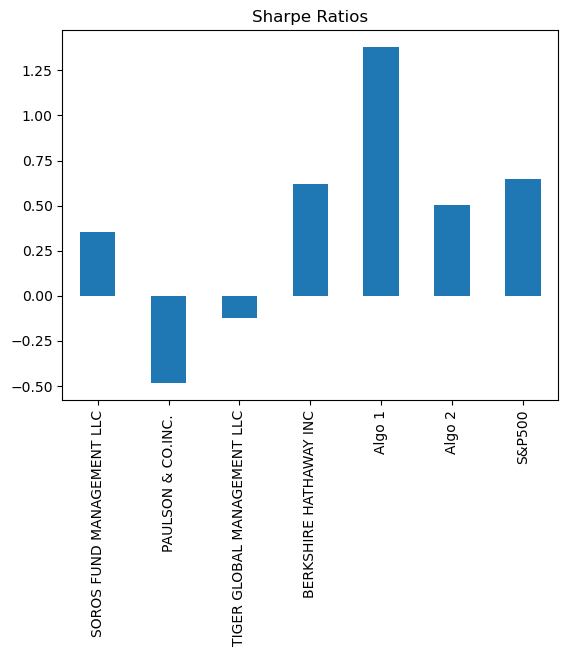

In [199]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [200]:
# ANSWER: On a risk-adjusted basis, the Algo 1 portfolio has outperfomed both the S&P500 and the whales portfolios. The Algo 2 portfolio has lagged behind the market and the Berkshire portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [201]:
# Reading data from 1st stock
jnj_history_csv = Path("Resources/jnj_history.csv")
jnj_returns_df = pd.read_csv(jnj_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
jnj_returns_df.head()

Close
Date                 
2005-03-21  66.849998
2005-03-22  66.790001
2005-03-23  68.199997
2005-03-24  68.089996
2005-03-28  68.349998

In [202]:
# Reading data from 2nd stock
fcx_history_csv = Path("Resources/fcx_history.csv")
fcx_returns_df = pd.read_csv(fcx_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
fcx_returns_df.head()

Close
Date                 
2005-03-21  20.160000
2005-03-22  20.035000
2005-03-23  19.455000
2005-03-24  19.360001
2005-03-28  19.315001

In [203]:
# Reading data from 3rd stock
nvda_history_csv = Path("Resources/nvda_history.csv")
nvda_returns_df = pd.read_csv(nvda_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
nvda_returns_df.head()

Close
Date                
2005-03-21  2.083333
2005-03-22  2.045833
2005-03-23  2.090000
2005-03-24  2.094167
2005-03-28  2.070833

In [221]:
# Combine all stocks in a single DataFrame
Bryces_combined_df = pd.concat([jnj_returns_df, fcx_returns_df, nvda_returns_df], axis="columns", join="inner")
Bryces_combined_df

Close      Close       Close
Date                                         
2005-03-21   66.849998  20.160000    2.083333
2005-03-22   66.790001  20.035000    2.045833
2005-03-23   68.199997  19.455000    2.090000
2005-03-24   68.089996  19.360001    2.094167
2005-03-28   68.349998  19.315001    2.070833
...                ...        ...         ...
2023-03-13  153.059998  37.610001  229.660004
2023-03-14  153.919998  38.040001  240.630005
2023-03-15  154.350006  35.509998  242.279999
2023-03-16  154.029999  36.099998  255.410004
2023-03-17  152.380005  36.230000  257.250000

[4530 rows x 3 columns]

In [222]:
# Reset Date index
Bryces_combined_df.sort_index(inplace=True)

In [206]:
# Reorganize portfolio data by having a column per symbol
Bryces_combined_df.columns = ['JNJ', 'FCX', 'NVDA']
Bryces_combined_df.head()

JNJ        FCX      NVDA
Date                                      
2005-03-21  66.849998  20.160000  2.083333
2005-03-22  66.790001  20.035000  2.045833
2005-03-23  68.199997  19.455000  2.090000
2005-03-24  68.089996  19.360001  2.094167
2005-03-28  68.349998  19.315001  2.070833

In [207]:
# Calculate daily returns
Bryces_combined_df.dropna()
Bryces_combined_df
Bryces_combined_returns = Bryces_combined_df.pct_change()

# Drop NAs
Bryces_combined_returns.dropna(inplace=True)

# Display sample data
Bryces_combined_returns.head()

JNJ       FCX      NVDA
Date                                    
2005-03-22 -0.000897 -0.006200 -0.018000
2005-03-23  0.021111 -0.028949  0.021589
2005-03-24 -0.001613 -0.004883  0.001994
2005-03-28  0.003819 -0.002324 -0.011142
2005-03-29 -0.006291 -0.019933 -0.022133

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [208]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted_returns = Bryces_combined_returns.dot(weights)
my_portfolio_weighted_returns = my_portfolio_weighted_returns.rename("Weighted Portfolio")
# Display sample data
my_portfolio_weighted_returns.head()

Date
2005-03-22   -0.008366
2005-03-23    0.004583
2005-03-24   -0.001501
2005-03-28   -0.003216
2005-03-29   -0.016119
Name: Weighted Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [209]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  Weighted Portfolio  
Date                                                
2015-03-03 -0.000949 -0.004539           -0.011245  
2015-03-04  0.002416 -0.004389           -0.000396  
2015-03-05  0.004323  0.001196           -0.001618  
2015-03-06 -0.011460 -0.014174           -0.024738  
2015-03-09  0.001303  0.003944            0.005805

In [210]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_2_df.pct_change
combined_portfolios_2_df.dropna(inplace=True)
combined_portfolios_2_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  Weighted Portfolio  
Date                                                
2015-03-03 -0.000949 -0.004539           -0.011245  
2015-03-04  0.002416 -0.004389           -0.000396  
2015-03-05  0.004323  0.001196           -0.001618  
2015-03-06 -0.011460 -0.014174           -0.024738  
2015-03-09  0.001303  0.003944            0.005805

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [211]:
# Calculate the annualized `std`
combined_portfolios_2_df_annualized_std = combined_portfolios_2_df_daily_std *np.sqrt(252)
combined_portfolios_2_df_annualized_std.sort_values(ascending=False)
combined_portfolios_2_df_annualized_std

Weighted Portfolio             0.288242
BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

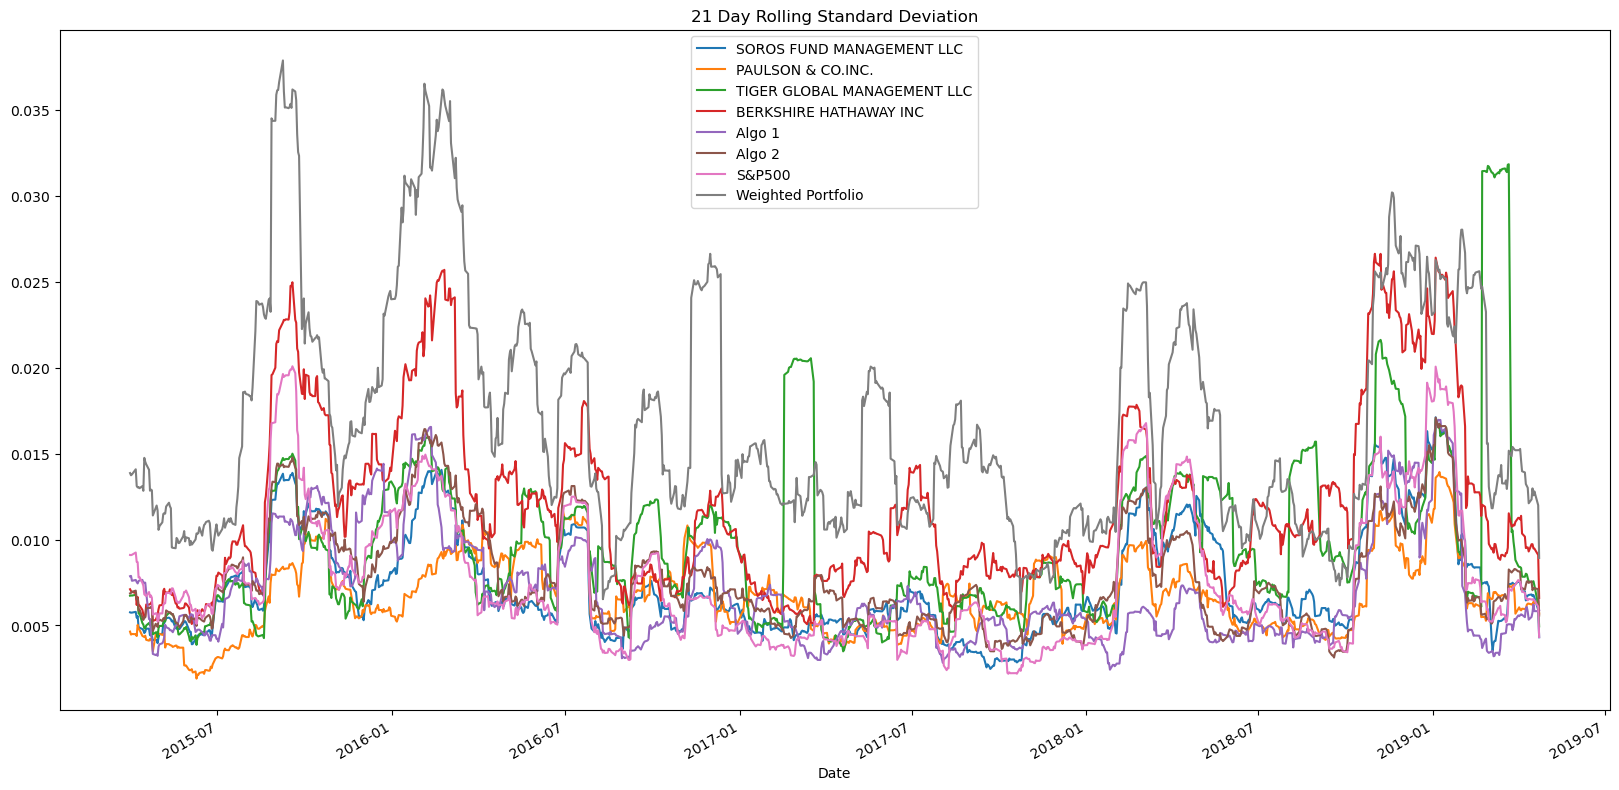

In [217]:
# Calculate & Plot rolling standard deviation
combined_portfolios_2_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

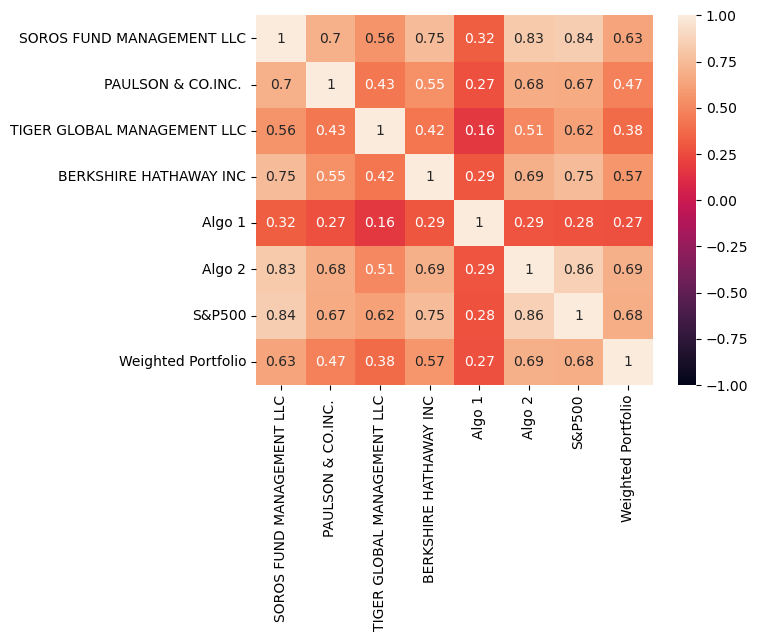

In [218]:
# Calculate and plot the correlation
combined_portfolios_2_df_correlation = combined_portfolios_2_df.corr()
combined_portfolios_2_df_correlation

sns.heatmap(combined_portfolios_2_df_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

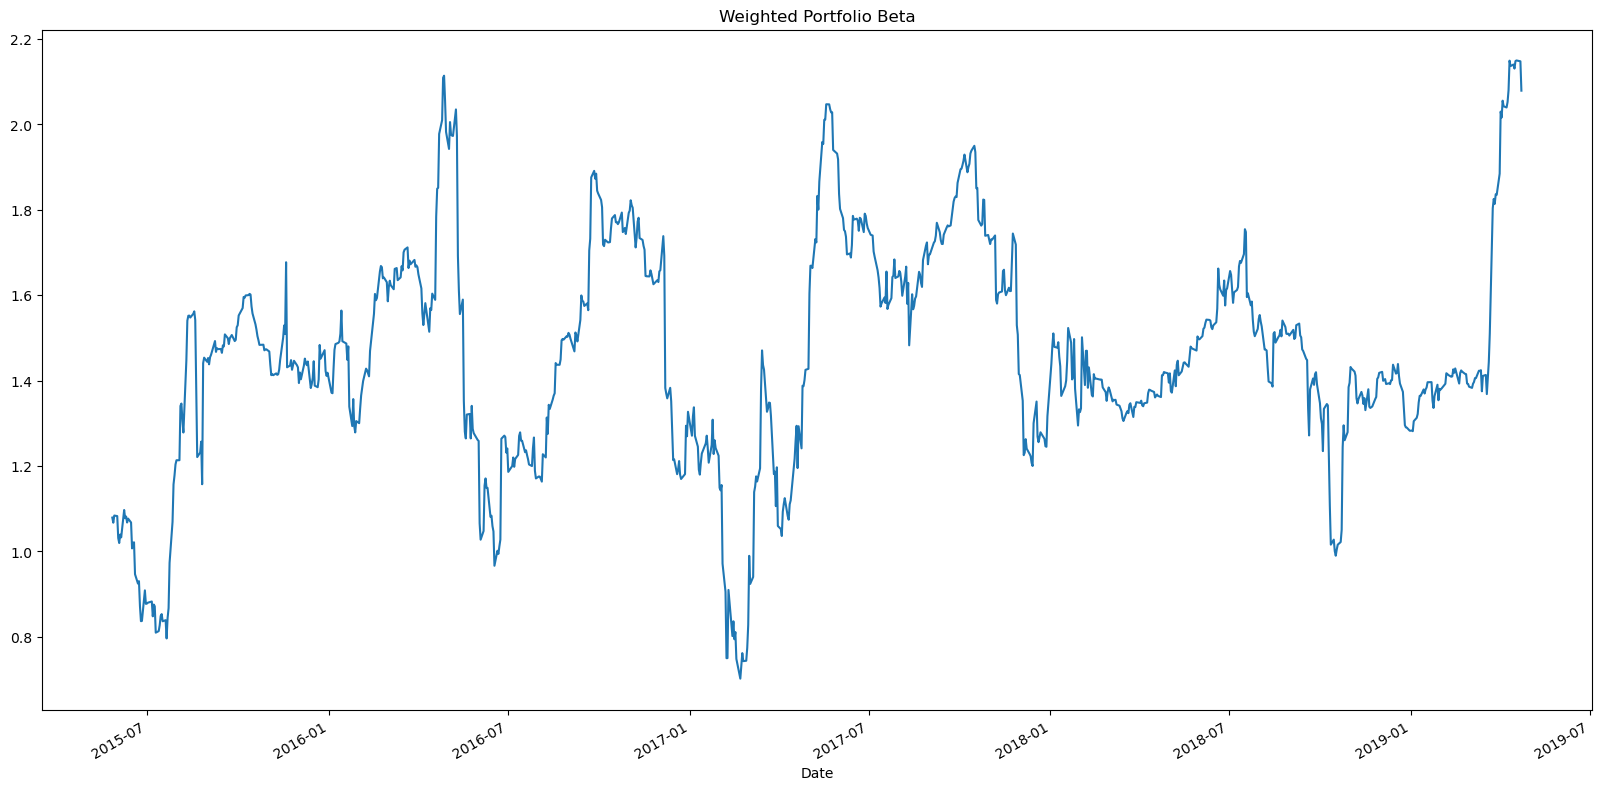

In [227]:
# Calculate and plot Beta
weighted_covariance = combined_portfolios_2_df['Weighted Portfolio'].rolling(window=60).cov(combined_portfolios_2_df['S&P500'])
weighted_covariance

weighted_variance = combined_portfolios_df['S&P500'].rolling(window=60).var()
weighted_variance

weighted_portfolio_beta = weighted_covariance / weighted_variance
weighted_portfolio_beta_plot = weighted_portfolio_beta.plot(title="Weighted Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [224]:
# Calculate Annualized Sharpe Ratios
combined_portfolios_2_df_sharpe_ratios = (combined_portfolios_2_df.mean() * 252) / (combined_portfolios_2_df.std() * np.sqrt(252))
combined_portfolios_2_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
Weighted Portfolio             0.888079
S&P500                         0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

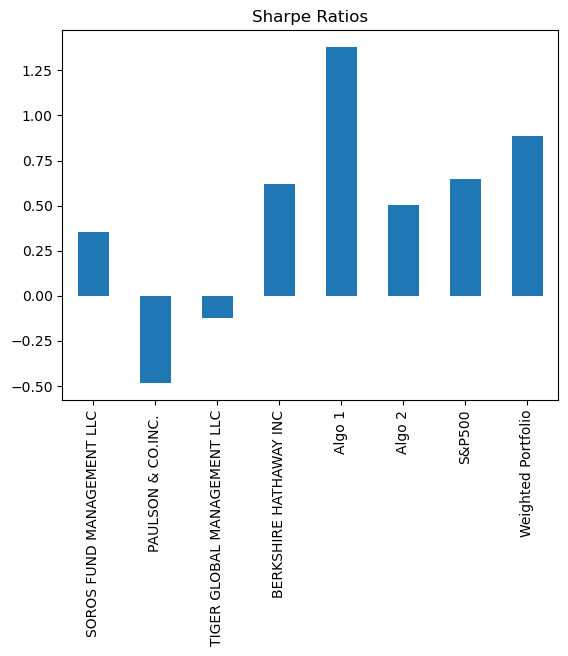

In [226]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_2_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

The Weighted Portfolio (WP) comprised of JNJ, FCX & NVDA stocks has the highest annualized standard deviation of all the portfolios (0.288). This volatility may scare off would-be investors, especially when coupled with the WP Beta chart- but there is more to the story. The Algo_1 portfolio had the highest Sharpe Ratio, but the WP was not far behind at 0.889. This means that on a risk-adjusted basis, performance was stronger than most of the other portfolios - which includes the likes of George Soros and Warren Buffet. The WP had the strongest correlation to the Algo 2 portfolio (.69) and the weakest correlation with the Algo 1 portfolio (.27). 

When compared to the algorithmic trading portfolios, Algo 1 is the best in several categories. The WP faired well, especially considering I selected the stocks totally at random. The Algo 2 portfolio did have some strong data in several categories, but overall trailed the WP.